In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import mean_squared_error, accuracy_score

In [2]:
with open("../db/train_data_unp.pkl", 'rb') as f:
    df = pickle.load(f)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 26641
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                10093 non-null  int64 
 1   Area                 10093 non-null  int64 
 2   Location             10093 non-null  object
 3   No. of Bedrooms      10093 non-null  int64 
 4   Resale               10093 non-null  int64 
 5   MaintenanceStaff     10093 non-null  int64 
 6   Gymnasium            10093 non-null  int64 
 7   SwimmingPool         10093 non-null  int64 
 8   LandscapedGardens    10093 non-null  int64 
 9   JoggingTrack         10093 non-null  int64 
 10  RainWaterHarvesting  10093 non-null  int64 
 11  IndoorGames          10093 non-null  int64 
 12  ShoppingMall         10093 non-null  int64 
 13  Intercom             10093 non-null  int64 
 14  SportsFacility       10093 non-null  int64 
 15  ATM                  10093 non-null  int64 
 16  ClubHouse

In [4]:
df.drop('Location', inplace=True,axis=1)
targets = df['Price']

Из ныне колонок что мы имеем нам следует убрать из тренировочного датасета цену, т.к. она является целью тренировки модели и дальнейшей работы, которая будет проведена.

Большинство из параметров в датасете уже онехотнута. Только локация вызывает некоторые опасения, ибо из-за этого параметра модель может начать заучивать места, а не обучаться, Но ещё проблема в том

In [5]:
categorical_cols = df.select_dtypes('object').columns.tolist()
encoder = OneHotEncoder(sparse_output=False,drop = None,
                        dtype = np.float64,
                        handle_unknown='ignore', sparse=False)

encoder.fit(df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
df[encoded_cols] = encoder.transform(df[categorical_cols])


C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
df.drop('Town', inplace=True,axis=1)

C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Strange\anaconda3\Lib\site-packages\skl

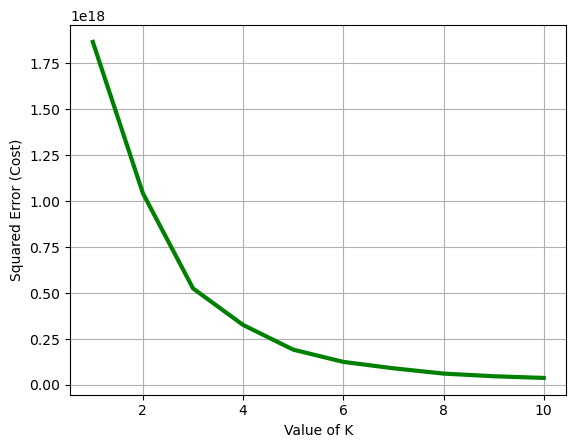

In [7]:

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(df)

    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)

# plot the cost against K values
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.grid()
plt.show() # clear the plot

# the point of the elbow is the 
# most optimal value for choosing k


In [8]:
kmeans=KMeans(n_clusters=5, max_iter=500)
kmeans.fit(df)
predict=kmeans.predict(df)
df['KMeans5'] = pd.Series(predict, index=df.index)

C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
with open('../db/clusterization.pkl', 'wb') as f:
    pickle.dump(kmeans,f)

In [10]:
df.head()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,Sofa,Wardrobe,Stadium,Town_Bangalore,Town_Chennai,Town_Delhi,Town_Hyderabad,Town_Kolkata,Town_Mumbai,KMeans5
0,30000000,3340,4,0,1,1,1,1,1,1,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,7888000,1045,2,0,0,1,1,1,1,1,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,3
2,4866000,1179,2,0,0,1,1,1,1,1,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,3
3,8358000,1675,3,0,0,0,0,0,0,0,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,6845000,1670,3,0,1,1,1,1,1,1,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,3


In [11]:
prices_by_clusters = df.groupby(['KMeans5','Area'])['Price'].mean()
prices_by_clusters = df.reset_index()

In [12]:
for i in prices_by_clusters['KMeans5'].unique():
    prices_by_clusters.sort_values('Price', ascending=True,inplace=True)
    print(f'Cluster {i}')
    print(f'10 most cheap areas')
    for h,d in zip(prices_by_clusters[prices_by_clusters['KMeans5']==i]['Area'].iloc[:10],
                   prices_by_clusters[prices_by_clusters['KMeans5']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')
    prices_by_clusters.sort_values('Price', ascending=False,inplace=True)
    print(f'10 most expesives areas')
    for h,d in zip(prices_by_clusters[prices_by_clusters['KMeans5']==i]['Area'].iloc[:10],
                   prices_by_clusters[prices_by_clusters['KMeans5']==i]['Price'].iloc[:10]):
        print(f'{h} mean price {d}')
    print(' ')

Cluster 0
10 most cheap areas
2282 mean price 12300000
1300 mean price 12300000
2285 mean price 12300000
1305 mean price 12300000
1850 mean price 12300000
1675 mean price 12300000
1675 mean price 12300000
1850 mean price 12300000
1675 mean price 12300000
1675 mean price 12300000
 
10 most expesives areas
2400 mean price 32500000
3448 mean price 32500000
1800 mean price 32500000
2316 mean price 32500000
997 mean price 32500000
1800 mean price 32500000
1200 mean price 32500000
3250 mean price 32500000
4290 mean price 32100000
3180 mean price 32000000
 
Cluster 3
10 most cheap areas
500 mean price 2000000
275 mean price 2000000
500 mean price 2000000
275 mean price 2000000
400 mean price 2000000
275 mean price 2000000
420 mean price 2000000
450 mean price 2000000
275 mean price 2000000
495 mean price 2000000
 
10 most expesives areas
1885 mean price 12200000
1740 mean price 12200000
1740 mean price 12200000
1944 mean price 12200000
1691 mean price 12200000
1850 mean price 12200000
1850 me

Прошла кластеризация и квартиры были распределены среди кластеров по средней стоимости.

In [13]:
df.drop('KMeans5', inplace=True,axis=1)

In [14]:
train_df, val_df = train_test_split(df, test_size=0.25,random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2,random_state=42)

In [15]:
#Индексы обнуляются, дабы машина потом при обучении не сдохла, путаясь в индексах

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [16]:
train_targets=train_df['Price'].copy()
val_targets=val_df['Price'].copy()
test_targets=test_df['Price'].copy()

In [17]:
train_df.drop('Price', inplace=True,axis=1)
val_df.drop('Price', inplace=True,axis=1)
test_df.drop('Price', inplace=True,axis=1)

In [18]:
#Создание базовых моделей

def rand_min_max(min_n,max_n,ammount) -> pd.Series:
    rand_numb = np.random.randint(min_n, high = max_n,size = ammount)
    series = pd.Series(rand_numb)
    return series

def same_stuff(n,meany) -> pd.Series:
    rand_numb = np.random.randint(meany, high = meany+1,size = n)
    series = pd.Series(rand_numb)
    return series

In [19]:
test_targets.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2019 entries, 0 to 2018
Series name: Price
Non-Null Count  Dtype
--------------  -----
2019 non-null   int64
dtypes: int64(1)
memory usage: 15.9 KB


In [20]:
pred = rand_min_max(test_targets.min(),test_targets.max(),len(test_targets.index))
pred_same = same_stuff(len(test_targets.index),test_targets.mean())

In [21]:
print(accuracy_score(pred,test_targets))
print(accuracy_score(pred_same,test_targets))

0.0
0.0


In [22]:
def score_model(models):
    for i in models:
        print(f'{i}')
        print(i.score(train_df, train_targets))
        print(i.score(val_df, val_targets))
        print(i.score(test_df, test_targets))
        print(mean_squared_error(i.predict(train_df), train_targets))
        print(mean_squared_error(i.predict(val_df), val_targets))
        print(mean_squared_error(i.predict(test_df), test_targets))
        print(' ')

In [23]:
lr = LinearRegression()
lr.fit(train_df, train_targets)

LinearRegression()

In [24]:
ls=Lasso(random_state=42)
ls.fit(train_df,train_targets)

C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.571e+16, tolerance: 1.503e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=42)

In [25]:
lgr = LogisticRegression(random_state=42,max_iter=100)
lgr.fit(train_df, train_targets)

C:\Users\Strange\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [26]:
rndf = RandomForestClassifier(n_estimators=20,random_state=42,max_depth=20,min_impurity_decrease=0.00005)
rndf.fit(train_df, train_targets)

RandomForestClassifier(max_depth=20, min_impurity_decrease=5e-05,
                       n_estimators=20, random_state=42)

In [27]:
score_model([rndf])

RandomForestClassifier(max_depth=20, min_impurity_decrease=5e-05,
                       n_estimators=20, random_state=42)
0.8476591528362646
0.375594294770206
0.2590391282813274
1114153171642.073
96481223024721.11
120440923862275.4
 


In [28]:
score_model([lr,ls,lgr,rndf])

LinearRegression()
0.5617157047901835
0.4940780573068637
0.44850290027499873
81591278288947.98
90687209056943.8
99259738443152.48
 
Lasso(random_state=42)
0.5617157047790635
0.494078514498535
0.4485033701722697
81591278291018.1
90687127104703.39
99259653869942.14
 
LogisticRegression(random_state=42)
0.009908347783007183
0.009904912836767036
0.009410599306587419
206756284896290.84
202658173913164.84
205295334516988.62
 
RandomForestClassifier(max_depth=20, min_impurity_decrease=5e-05,
                       n_estimators=20, random_state=42)
0.8476591528362646
0.375594294770206
0.2590391282813274
1114153171642.073
96481223024721.11
120440923862275.4
 


In [33]:
with open('../model/lasso.pkl', 'wb') as f:
    pickle.dump(ls,f)

In [30]:
with open('../db/df.pkl', 'wb') as f:
    pickle.dump(df,f)